In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

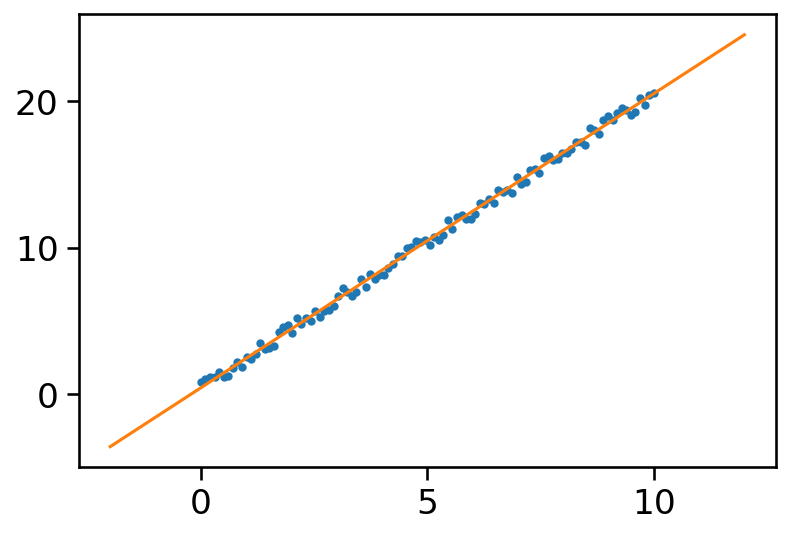

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
model = LinearRegression()
x = np.linspace(0, 10, 100)
y = 2*x +  + np.random.rand(100)
model.fit(x[:, np.newaxis], y)
fig, ax = plt.subplots(dpi=150)
ax.plot(x, y, '.')
x = np.linspace(-2, 12, 10)
ax.plot(x, model.predict(x[:, np.newaxis]))

In [3]:
from sklearn.model_selection import train_test_split
iris = sns.load_dataset('iris')
X_iris = iris.iloc[:, 0:4]
y_iris = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

D:\ProgrammFiles\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


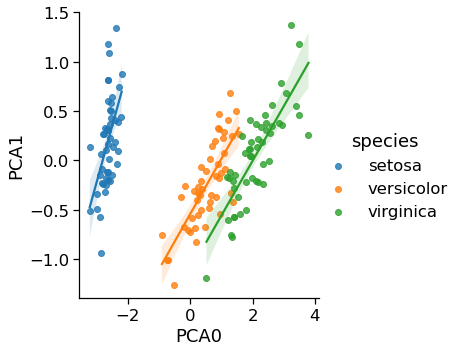

In [4]:
# method main component
from sklearn.decomposition import PCA

model = PCA(n_components=2)
model.fit(X_iris, y_iris)
X_2D = model.transform(X_iris)
iris['PCA0'] = X_2D[:, 0]
iris['PCA1'] = X_2D[:, 1]
sns.lmplot('PCA0', 'PCA1', hue='species', data=iris)

D:\ProgrammFiles\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


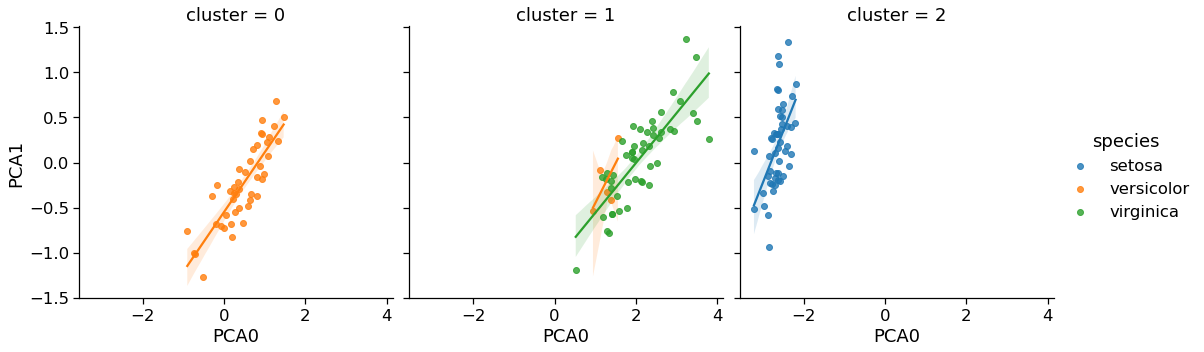

In [5]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)
iris['cluster'] = y_gmm
sns.lmplot('PCA0', 'PCA1', hue='species', data=iris, col='cluster')

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
for i in range(1, 7):
    model = KNeighborsClassifier(n_neighbors=i)
    print('{:3d} {:5.3f}'.format(i, np.mean(cross_val_score(model, X_iris, y_iris, cv=5))))

  1 0.960
  2 0.947
  3 0.967
  4 0.973
  5 0.973
  6 0.980


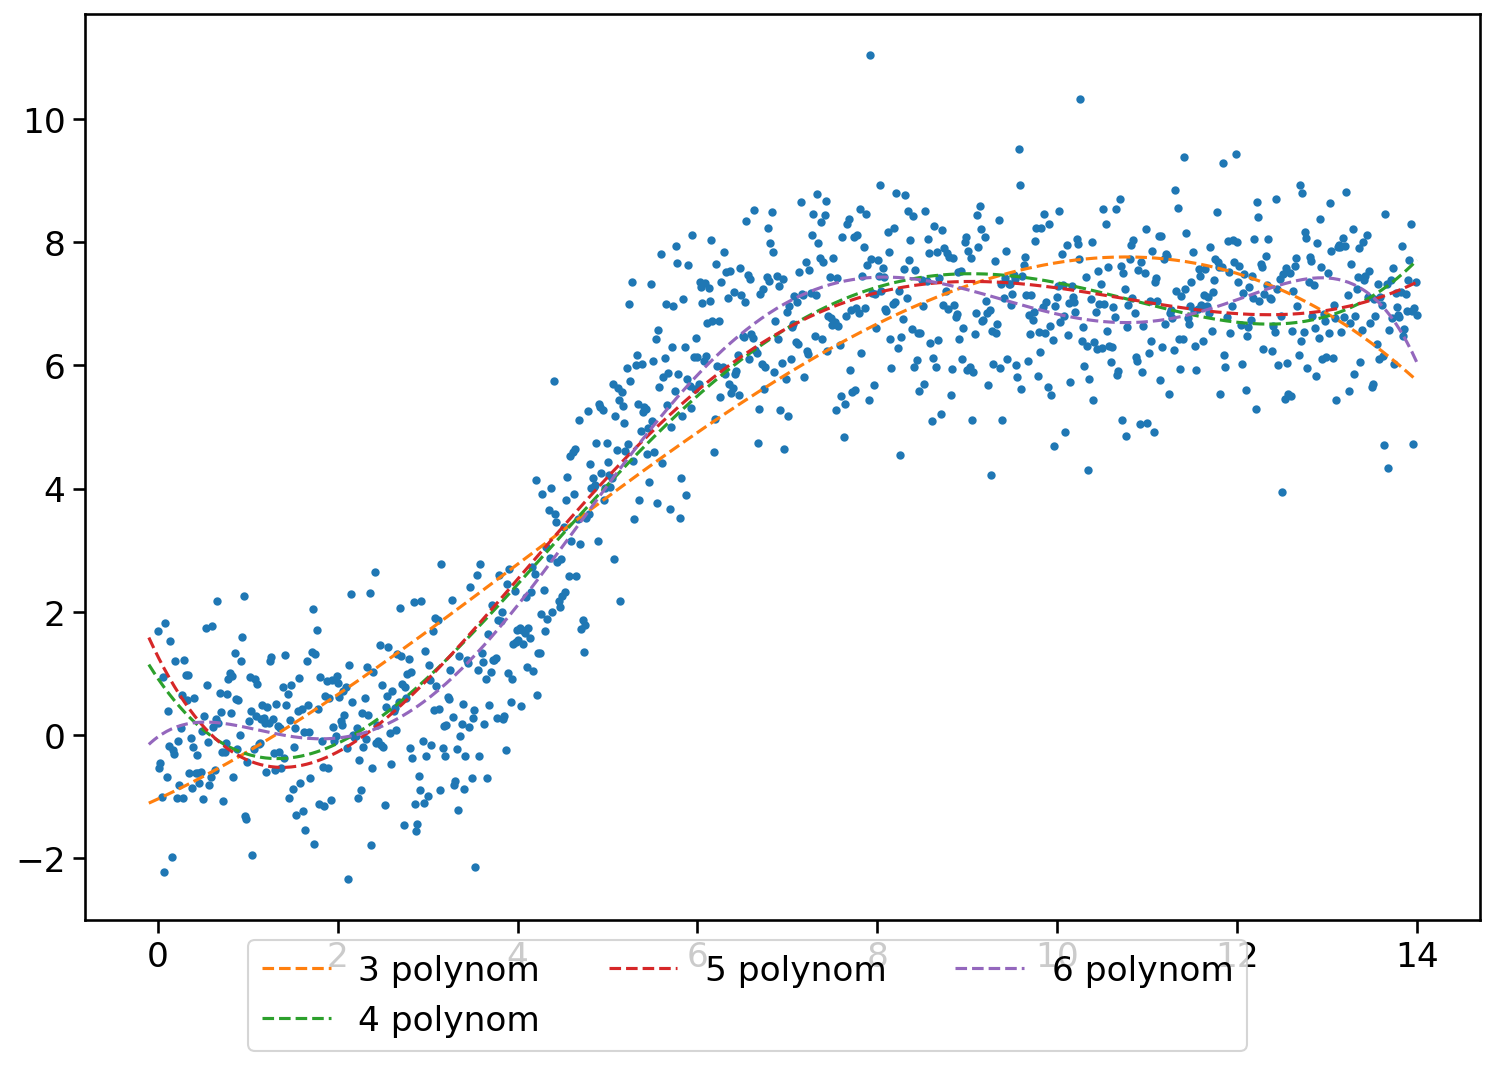

In [7]:
from sklearn.preprocessing import PolynomialFeatures # make polynom N power from data
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline # make 

def func(pH, v=7, c=-0.3,  pKinsp=8, pKinsm=4.5, pKcht=6.5, Ncht=7, Ninsp=3.3, Ninsm=2.8):
    E = v + c*( Ncht*(1-(10**(pKcht-pH) + 1)**-1) ) * \
        ( Ninsp*(1-(10**(pKinsp-pH) + 1)**-1) - Ninsm*((10**(pKinsm-pH) + 1)**-1) )
    return E

def PolynomialRegression(degree=2, **kward):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kward))

def make_data(func, N, err=1, rseed=1):
    rng = np.random.RandomState(rseed)
    X = np.linspace(0, 14, N)[:, np.newaxis]
    y = func(X.ravel())
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(func, 1000)
X_test = np.linspace(-0.1, 14, 500)[:, np.newaxis]
fig, ax = plt.subplots(dpi=150, figsize=(12, 8))
ax.plot(X, y, '.')
for i in range(3, 7):
    y_test = PolynomialRegression(i).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, '--', label=f'{i} polynom')
fig.legend(ncol=3, loc='lower center')

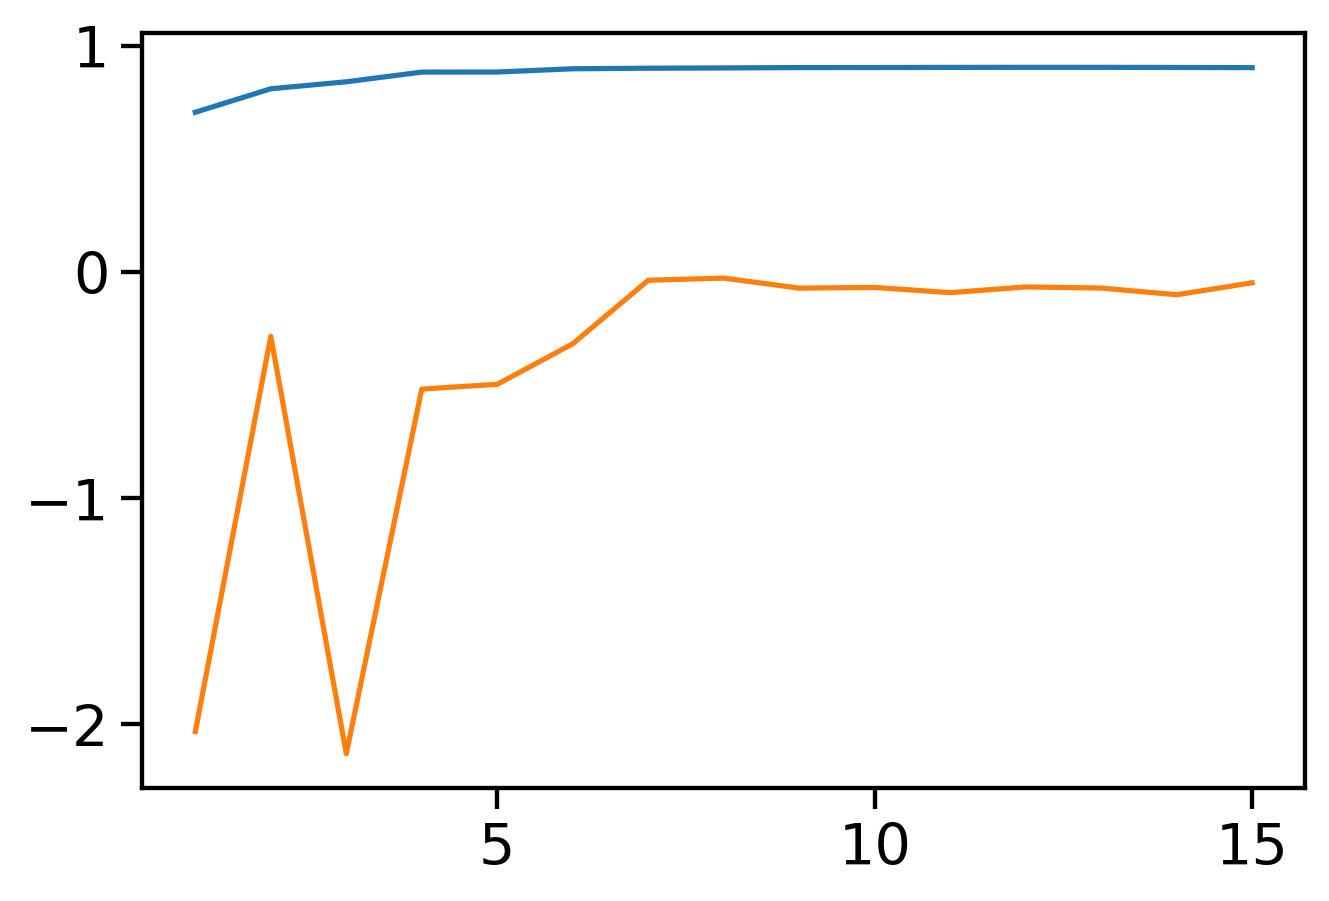

In [8]:
from sklearn.model_selection import validation_curve
degree = np.arange(1, 16)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, param_name='polynomialfeatures__degree', param_range=degree, cv=7)
fig, ax = plt.subplots(dpi=250)
ax.plot(degree, np.median(train_score, 1), label='train')
ax.plot(degree, np.median(val_score, 1), label='validation')

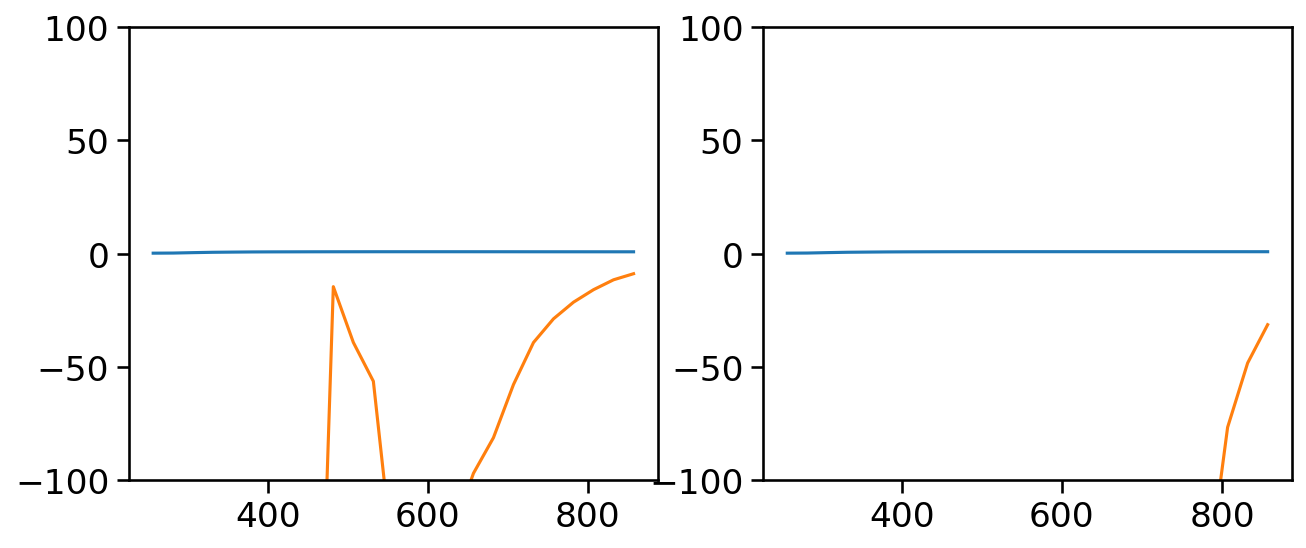

In [9]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, dpi=150, figsize=(10, 4))
for i, degree in enumerate([3, 5]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7, train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), label='train_score')
    ax[i].plot(N, np.mean(val_lc, 1), label='validation_score')
    ax[i].set(ylim=(-1e2, 1e2))